# Data Profiling (Preprocessing)

In [ ]:
import pandas
import seaborn as sb
import matplotlib.pyplot as plt

moviedata = pandas.read_csv("tmdb_5000_movies.csv")

# Gathering dataset information
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# Checking any NaN value in every column
moviedata.isna().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

In [ ]:
# NaN percentage in every column
print("NaN Percentage in every column\n")
for i in moviedata:
  percentage = (moviedata[i].isna().sum()/11466)*100
  print(i, ": %.2f %%" % percentage)

NaN Percentage in every column

budget : 0.00 %
genres : 0.00 %
homepage : 26.96 %
id : 0.00 %
keywords : 0.00 %
original_language : 0.00 %
original_title : 0.00 %
overview : 0.03 %
popularity : 0.00 %
production_companies : 0.00 %
production_countries : 0.00 %
release_date : 0.01 %
revenue : 0.00 %
runtime : 0.02 %
spoken_languages : 0.00 %
status : 0.00 %
tagline : 7.36 %
title : 0.00 %
vote_average : 0.00 %
vote_count : 0.00 %


In [ ]:
# Describing Data
moviedata.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


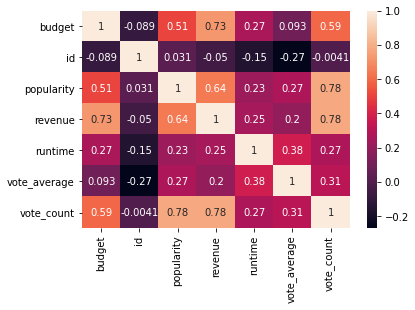

In [ ]:
# Data Correlation Matrix
correlation_matrix = moviedata.corr()
sb.heatmap(data = correlation_matrix, annot = True)
plt.show()

# Data Cleaning and Data Distribution (Preprocessing)

In [ ]:
# Removing unrelated columns
upd_moviedata = moviedata.drop(['genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title'], axis='columns')

In [ ]:
# Checking any NaN value in every column
upd_moviedata.isna().any()

budget          False
popularity      False
revenue         False
runtime          True
vote_average    False
vote_count      False
dtype: bool

In [ ]:
# Changing value 0 into mean for each column
upd_moviedata = upd_moviedata.replace(0,upd_moviedata.mean())

In [ ]:
# Changing NaN value into mean for each column
upd_moviedata = upd_moviedata.fillna(upd_moviedata.mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


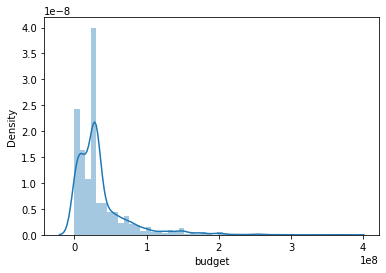

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


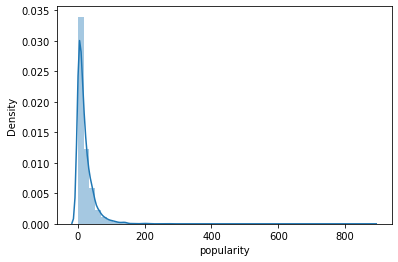

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


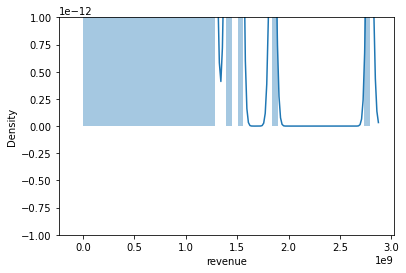

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


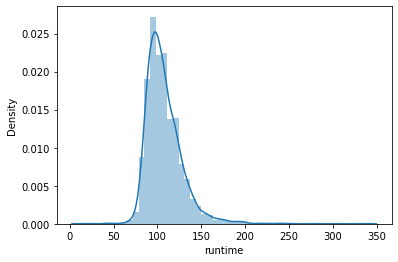

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


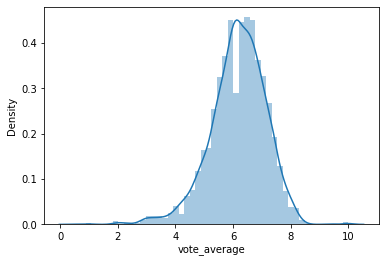

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


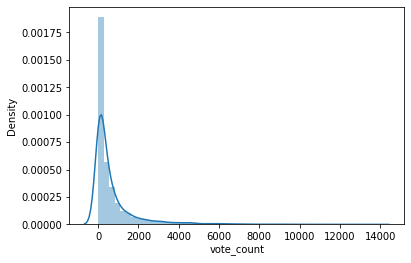

In [ ]:
# Data distribution and Probability Density Function
for i in upd_moviedata:
  sb.distplot(upd_moviedata[i])
  plt.show()

# Choosing Dependant Variables (Feature Engineering)

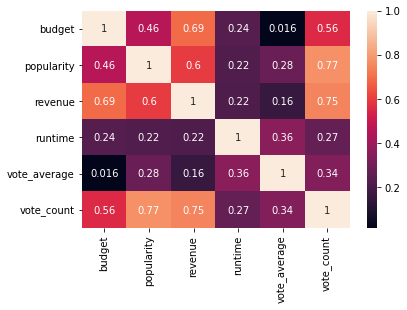

In [ ]:
corr_matrix = upd_moviedata.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

I believe that *revenue* can be considered as the Y since it is dependant with *budget*, *popularity*, *vote_count* and has the suitable correlation values, which are 0.69, 0.6, and 0.75 consecutively (above or equal with 0.6). It also means that *budget*, *popularity*, *vote_count* will be the most suitable predictor for *revenue* since it has equal or higher correlation values than 0.6, which are 0.69, 0.6, and 0.75 consecutively. Meanwhile, *runtime* and *vote_average* are not included as the predictor of *revenue* since they have correlation values below 0.3 and close to 0.

# Data Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Splitting data between train and test
x = upd_moviedata[["budget", "popularity", "vote_count"]]
y = upd_moviedata["revenue"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2)

# 2. Fit data into Linear Model
model = LinearRegression().fit(trainx, trainy)

# 3. Data Test Prediction
test_pred = model.predict(testx)
for i in range(len(testy)):
  print(testx.values[i], test_pred[i])

[2.90450399e+07 1.86644300e+00 2.20000000e+01] 52044577.25166921
[6.2440870e+06 1.4970654e+01 2.5900000e+02] 32117095.42860692
[1.90000e+07 7.38652e-01 3.00000e+00] 35003823.47447349
[5.5000000e+07 1.5274137e+01 3.0300000e+02] 111537196.91581115
[2.90450399e+07 1.67544520e+01 3.22000000e+02] 72079683.85513324
[2.90450399e+07 1.20245000e+00 8.00000000e+00] 51110389.6978876
[6.00000000e+06 1.43659698e+02 5.89300000e+03] 404149146.8368335
[4.000000e+07 8.303696e+00 1.520000e+02] 77921501.14905898
[1.300000e+07 6.735922e+00 1.540000e+02] 35632168.72497571
[2.90450399e+07 2.14923006e+01 6.90217989e+02] 96325842.98557508
[2.90450399e+07 7.43631500e+00 1.42000000e+02] 60048804.22123356
[3.8000000e+07 1.4779041e+01 4.5200000e+02] 94603017.8547202
[2.90450399e+07 7.16764000e-01 1.30000000e+01] 51425615.329102226
[1.3000000e+07 1.6681567e+01 3.0800000e+02] 45975525.22358976
[2.90450399e+07 6.98835700e+00 7.10000000e+01] 55385506.44846419
[1.500000e+07 1.833058e+00 7.000000e+00] 29015196.77195750

The first step that I have performed in the training process is splitting the data into train and test by utilizing sklearn.model_selection train_test_split with test size is 0.2 of the train size. The Xs are  *budget, popularity, vote_count* and the Y is *revenue*. The second step that I have performed is fitting the train dataset into linear model by using .fit(). The third step is predict the Y value based on test dataset. In this stage, I use .predict() function. In addition, I also print all the Y predicted.

# Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# The learning model and evaluation results using evaluation metrics

# Dataset Test Result
print("R2 = ", r2_score(testy, test_pred))
print("Mean Absolute Error = ", mean_absolute_error(testy, test_pred))
print("Mean Squared Error = ", mean_squared_error(testy, test_pred))

R2 =  0.7060530973709802
Mean Absolute Error =  56202611.16459572
Mean Squared Error =  8702114743637363.0


To evaluate the learning model, **R2, Mean Absolute Error (MAE), and Mean Squared Error (MSE)** are utilized which can be obtained by using *sklearn.metrics* r2_score, mean_absolute_error, mean_squared_error. R2 shows the level of the variance in the dependent variable that explained by independent variable. R2 commonly measures the relation strength between your model and the reliant variable on 0 – 1 scale.  From the dataset train result above, the **R2 score obtained is 0.7060530973709802**. Mean Absolute Error (MAE) measures the absolute average distance between the predicted and the real data. From the dataset train result above, the **MAE score obtained is 56202611.16459572**. Mean Squared Error (MSE) is an estimator measures the average of error squares such as the average squared difference between the estimated values and true value. From the dataset train result above, the **MSE score obtained is 8702114743637363**.

In [ ]:
# Checking underfitting or overfitting possibility
# Data Training predicition
train_pred = model.predict(trainx)
for i in range(len(trainy)):
  print(trainx.values[i], train_pred[i])

[2.50000e+05 1.30169e-01 3.00000e+00] 5557465.69366238
[2.90450399e+07 1.34765960e+01 2.70000000e+02] 68589170.32477905
[1.500000e+07 6.216203e+00 2.520000e+02] 45179135.422979206
[3.5000000e+07 3.8100488e+01 9.2300000e+02] 121347854.85493566
[2.000000e+07 9.455596e+00 1.310000e+02] 45182018.7922151
[3.0000000e+06 1.1158167e+01 2.1600000e+02] 24110571.51438314
[4.0000000e+07 2.6072228e+01 9.0200000e+02] 127513773.78391697
[1.0000000e+07 1.0072199e+01 1.9600000e+02] 33760037.8752031
[4.700000e+07 6.067212e+00 7.400000e+01] 83741527.17940478
[4.300000e+07 5.418921e+00 2.080000e+02] 86226047.4233456
[8.000000e+06 4.932893e+00 8.100000e+01] 22955085.020912077
[1.7500000e+07 1.4304444e+01 1.7200000e+02] 44067721.47419163
[1.5000000e+07 4.3644978e+01 3.0450000e+03] 229128624.206643
[3.0000000e+06 1.3338539e+01 1.5500000e+02] 20169421.33386994
[1.500000e+06 4.680206e+00 1.830000e+02] 19428943.211955883
[2.0000000e+07 7.3567232e+01 3.0160000e+03] 235839005.38113794
[7.0000000e+06 2.1626288e+01

In [ ]:
# Dataset Train Result
print("R2 = ", r2_score(trainy, train_pred))
print("Mean Absolute Error = ", mean_absolute_error(trainy, train_pred))
print("Mean Squared Error = ", mean_squared_error(trainy, train_pred))

R2 =  0.6585761492504613
Mean Absolute Error =  53449454.55158375
Mean Squared Error =  7675263070504818.0


**Regarding underfitting and overfitting**, underfitting means that the model or the algorithm does not fit the data well enough. It usually happens when the data is not enough to build an accurate model. Meanwhile, overfitting occurs when a model gets trained with so much of data, it starts learning from the noise and inaccurate data entries in our data set. Hence to check that whether my model is underfitting, overfitting, or not, the evaluation result with the dataset train result can be compared. The model is not underfit since the predictors which correlate with revenue are budget, popularity, vote_count (correlation value is above 0.6). On the other hand, the result of the dataset train result (R2 = 0.6585761492504613) is not exceed the dataset test result (R2 =  0.7060530973709802). Therefore, it can be concluded that this model is not overfitted.